### Use ChIPSeeker to annotate the peaks

In [1]:
#BiocManager::install("ChIPseeker")
#BiocManager::install("TxDb.Hsapiens.UCSC.hg38.knownGene")
#BiocManager::install("org.Hs.eg.db")

In [2]:
library(tidyverse)
library(ChIPseeker)
library(TxDb.Hsapiens.UCSC.hg38.knownGene) # hg38 genome annotations
library(clusterProfiler)                  # For downstream enrichment analysis (optional)
library(org.Hs.eg.db)                     # Human gene annotations

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


ChIPseeker v1.40.0

If you use ChIPseeker in published research, please cite:
Qianwen Wang, Ming Li, Tianzhi Wu, Li Zhan, Lin Li, Meijun Chen, Wenqin Xie, Zijing Xie, Erqiang Hu, Shuangbin Xu, Guangchuang Yu. Exploring epigenomic datasets by ChIPseeker. Current Protocols 2022, 2(10): e585

Loading required package:

In [3]:
# load in the bed file with the peak coordinates
bed_file <- "07B_snATAC_peaks.bed"
peak_data <- readPeakFile(bed_file)

In [4]:
# hg38 annotation database
start_time <- proc.time()

txdb <- TxDb.Hsapiens.UCSC.hg38.knownGene

# perform peak annotation
peak_annotation <- annotatePeak(
  peak_data,
  TxDb = txdb,
  tssRegion = c(-1000, 1000), # define promoter region as 1kb upstream and downstream of TSS
  annoDb = "org.Hs.eg.db"     # add gene symbols and Entrez IDs
)

end_time <- proc.time()
elapsed_time <- end_time["elapsed"] - start_time["elapsed"]
print(paste0("Elapsed time in s: ", elapsed_time))

>> preparing features information...		 2025-02-12 07:52:17 PM 
>> identifying nearest features...		 2025-02-12 07:52:19 PM 
>> calculating distance from peak to TSS...	 2025-02-12 07:52:30 PM 
>> assigning genomic annotation...		 2025-02-12 07:52:30 PM 
>> adding gene annotation...			 2025-02-12 07:53:11 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2025-02-12 07:53:12 PM 
>> done...					 2025-02-12 07:53:12 PM 
[1] "Elapsed time in s: 56.099"


### Produce visualizations of peak annotations

pdf 
  2

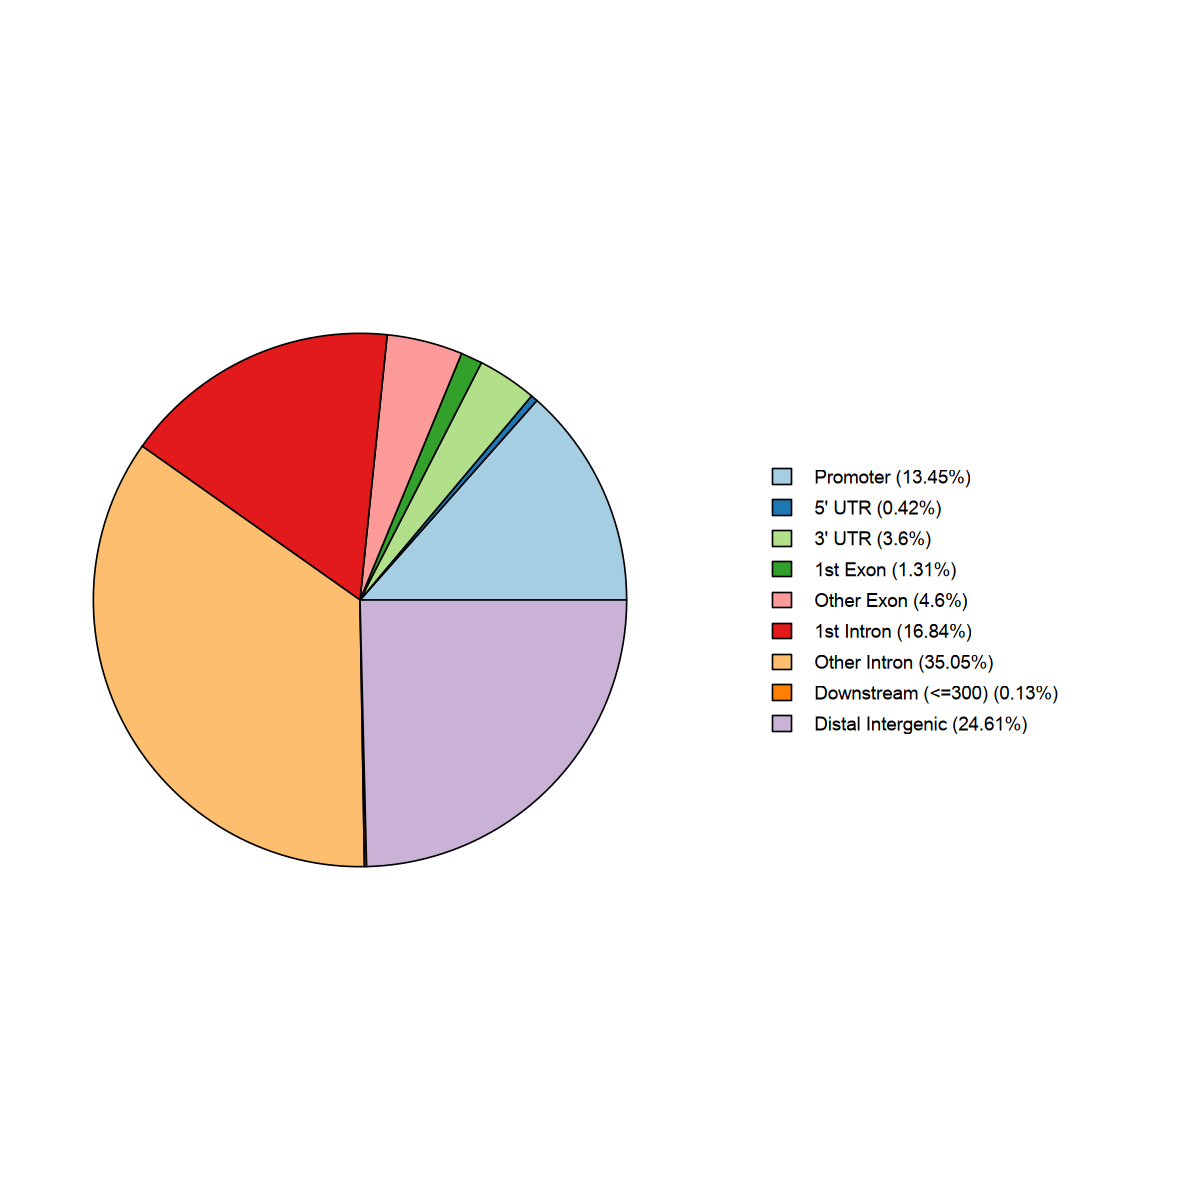

In [5]:
options(repr.plot.height = 10, repr.plot.width = 10)

pdf("../../paper_figures/snATAC_peak_annotation_pie_chart.pdf", width = 10, height = 10)
plotAnnoPie(peak_annotation)
dev.off()

plotAnnoPie(peak_annotation)

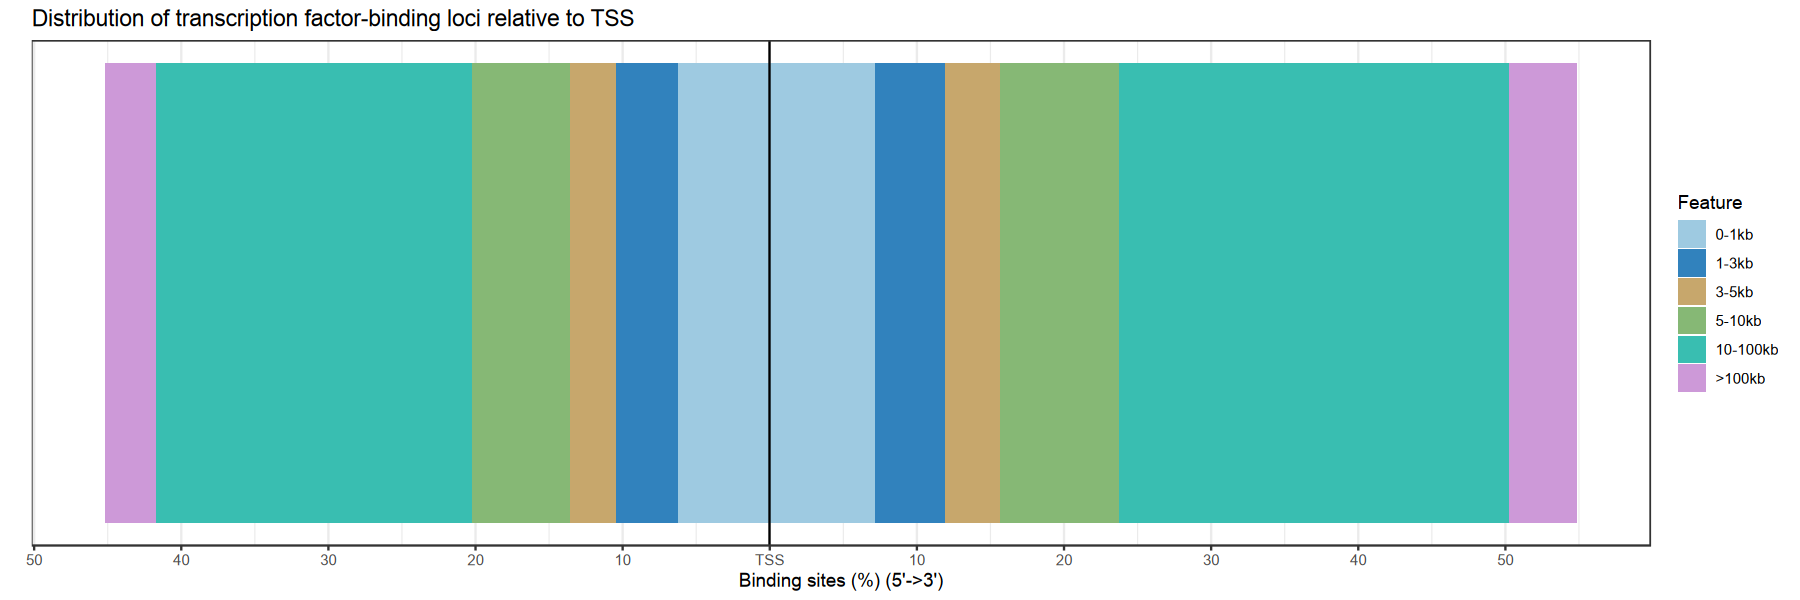

In [6]:
options(repr.plot.height = 5, repr.plot.width = 15)

plotDistToTSS(peak_annotation)

In [7]:
peak_annotation_df <- as.data.frame(peak_annotation)

In [8]:
peak_annotation_df

seqnames,start,end,width,strand,annotation,geneChr,geneStart,geneEnd,geneLength,geneStrand,geneId,transcriptId,distanceToTSS,ENSEMBL,SYMBOL,GENENAME
<fct>,<int>,<int>,<int>,<fct>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
chr1,794225,794725,501,*,"Intron (ENST00000655765.1/105378580, intron 1 of 2)",1,784396,807321,22926,1,124903817,ENST00000586288.1,9829,NA,LOC124903817,uncharacterized LOC124903817
chr1,794870,795370,501,*,"Intron (ENST00000655765.1/105378580, intron 1 of 2)",1,784396,807321,22926,1,124903817,ENST00000586288.1,10474,NA,LOC124903817,uncharacterized LOC124903817
chr1,798149,798649,501,*,"Intron (ENST00000655765.1/105378580, intron 1 of 2)",1,784396,807321,22926,1,124903817,ENST00000586288.1,13753,NA,LOC124903817,uncharacterized LOC124903817
chr1,802010,802510,501,*,"Intron (ENST00000655765.1/105378580, intron 1 of 2)",1,817371,819837,2467,1,400728,ENST00000326734.2,-14861,ENSG00000177757,FAM87B,family with sequence similarity 87 member B
chr1,806997,807497,501,*,"Exon (ENST00000412115.2/105378580, exon 4 of 5)",1,817371,819837,2467,1,400728,ENST00000326734.2,-9874,ENSG00000177757,FAM87B,family with sequence similarity 87 member B
chr1,807688,808188,501,*,"Exon (ENST00000443772.2/105378580, exon 4 of 4)",1,817371,819837,2467,1,400728,ENST00000326734.2,-9183,ENSG00000177757,FAM87B,family with sequence similarity 87 member B
chr1,810845,811345,501,*,"Intron (ENST00000635509.2/105378947, intron 1 of 3)",1,817371,819837,2467,1,400728,ENST00000326734.2,-6026,ENSG00000177757,FAM87B,family with sequence similarity 87 member B
chr1,811367,811867,501,*,"Intron (ENST00000635509.2/105378947, intron 1 of 3)",1,817371,819837,2467,1,400728,ENST00000326734.2,-5504,ENSG00000177757,FAM87B,family with sequence similarity 87 member B
chr1,814557,815057,501,*,"Intron (ENST00000635509.2/105378947, intron 1 of 3)",1,817371,819837,2467,1,400728,ENST00000326734.2,-2314,ENSG00000177757,FAM87B,family with sequence similarity 87 member B


In [9]:
# save df
write.csv(peak_annotation_df, "07C_annotated_peaks.csv", row.names = FALSE)

In [10]:
length(unique(peak_annotation_df$SYMBOL))

[1] 29914

### Extract the TSS

In [11]:
# load the TxDb object for hg38
txdb <- TxDb.Hsapiens.UCSC.hg38.knownGene

# obtain all gene symbols and their corresponding Entrez IDs
all_gene_symbols <- keys(org.Hs.eg.db, keytype = "SYMBOL")
all_entrez_ids <- mapIds(org.Hs.eg.db, keys = all_gene_symbols,
                         column = "ENTREZID", keytype = "SYMBOL", multiVals = "first")

# extract transcripts by gene
transcripts <- transcriptsBy(txdb, by = "gene")

# filter transcripts for valid Entrez IDs
valid_transcripts <- transcripts[names(transcripts) %in% all_entrez_ids]

# extract TSS positions (resize to width = 1)
tss <- resize(valid_transcripts, width = 1, fix = "start")

# convert to a data frame
tss_df <- as.data.frame(tss)

# add gene symbols to the data frame
tss_df$gene_symbol <- mapIds(org.Hs.eg.db, keys = tss_df$group_name,
                             column = "SYMBOL", keytype = "ENTREZID", multiVals = "first")

'select()' returned 1:many mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



In [12]:
tss_df

group,group_name,seqnames,start,end,width,strand,tx_id,tx_name,gene_symbol
<int>,<chr>,<fct>,<int>,<int>,<int>,<fct>,<int>,<chr>,<chr>
1,1,chr19,58347634,58347634,1,-,228947,ENST00000596924.1,A1BG
1,1,chr19,58353492,58353492,1,-,228948,ENST00000263100.8,A1BG
1,1,chr19,58356225,58356225,1,-,228949,ENST00000600123.5,A1BG
1,1,chr19,58353491,58353491,1,-,228950,ENST00000595014.1,A1BG
1,1,chr19,58347657,58347657,1,-,228951,ENST00000598345.1,A1BG
1,1,chr19,58362751,58362751,1,-,228952,ENST00000599109.5,A1BG
1,1,chr19,58353129,58353129,1,-,228953,ENST00000600966.1,A1BG
1,1,chr19,58356083,58356083,1,-,228954,ENST00000596636.1,A1BG
2,10,chr8,18386311,18386311,1,+,104459,ENST00000660285.1,NAT2
